In [1]:
from mtri_gmsh_helpers import *
import numpy as np
import matplotlib.tri as mtri

In [2]:
node_coords = [
    [1.00, -1.00], # 0
    [2.00, -1.25], # 1
    [3.00, -1.00], # 2
    [3.25, 0.00], # 3
    [3.00, 1.00], # 4
    [2.00, 1.25], # 5
    [1.00, 1.00], # 6
    [0.75, 0.00], # 7
    [2.10, 0.25], # 8
    [1.50, -0.50], # 9
    [2.50, -0.50]  # 10
]

tri_connectivity = [
    [0, 1, 9],
    [1, 10, 9],
    [1, 2, 10],
    [0, 9, 7],
    [2, 3, 10],
    [9, 8, 7],
    [9, 10, 8],
    [10, 3, 8],
    [7, 8, 5],
    [8, 3, 5],
    [7, 5, 6],
    [5, 3, 4]
]

# Create a Matplotlib triangulation object and plot it
triang = mtri.Triangulation(
    np.array([coord[0] for coord in node_coords]),
    np.array([coord[1] for coord in node_coords]),
    np.array(tri_connectivity)
)

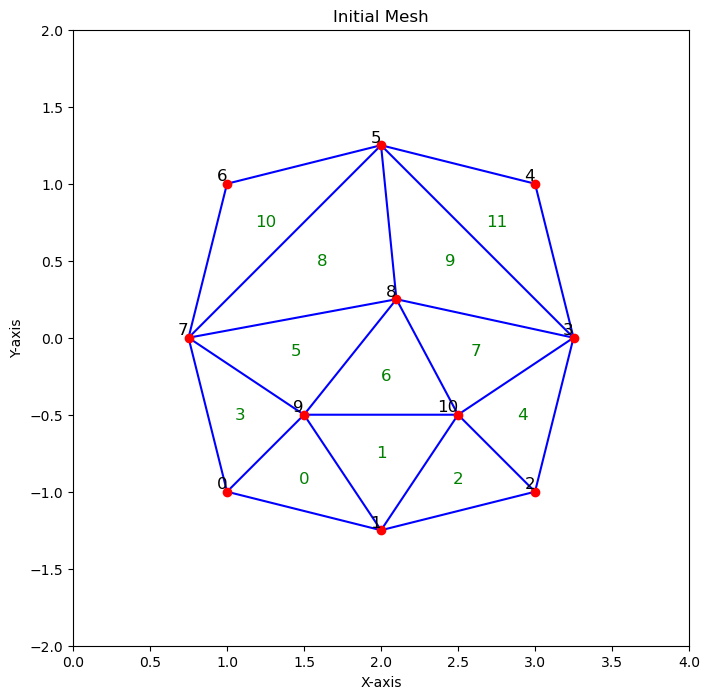

In [3]:
plot_triangulation_with_labels(triang, title='Initial Mesh', xlim=(0, 4), ylim=(-2, 2))

In [4]:
mtri_to_gmsh(triang=triang, filename="minDG2Mesh.msh")

Info    : Writing 'minDG2Mesh.msh'...
Info    : Done writing 'minDG2Mesh.msh'
GMSH mesh written to minDG2Mesh.msh


This `minDG2wWall.pkl` file is created using Goerge's DEGAS2 Geometry creation notebook.

In [5]:
mesh_with_wall = load_triangulation("minDG2wWall.pkl")
print(f"Mesh info:\n - Number of nodes: {len(mesh_with_wall.x)}\n - Number of triangles: {len(mesh_with_wall.triangles)}\n - Number of edges: {len(mesh_with_wall.edges)}")

Triangulation loaded from minDG2wWall.pkl
Mesh info:
 - Number of nodes: 19
 - Number of triangles: 28
 - Number of edges: 46


In [6]:
# Test the function with the loaded triangulation
mtri_to_gmsh(mesh_with_wall, "minDG2wWall.msh")

Info    : Writing 'minDG2wWall.msh'...
Info    : Done writing 'minDG2wWall.msh'
GMSH mesh written to minDG2wWall.msh


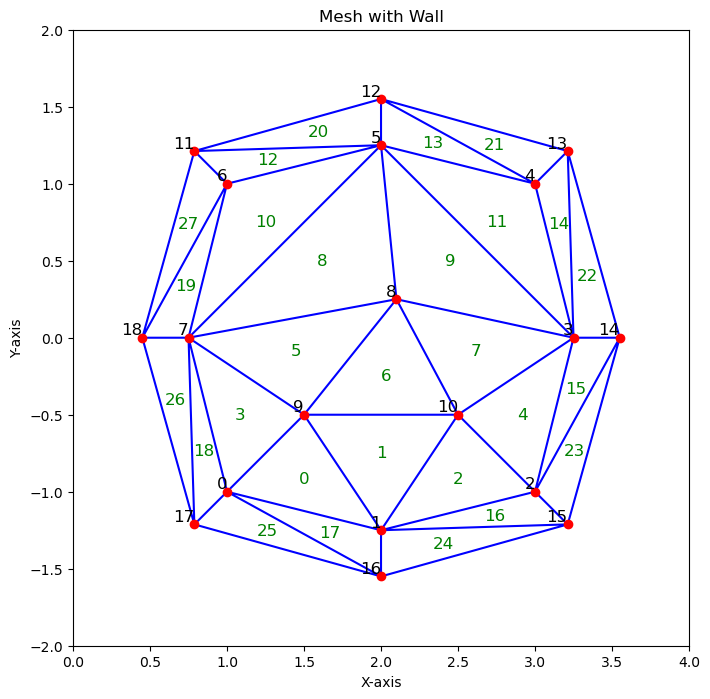

In [7]:
plot_triangulation_with_labels(mesh_with_wall, title='Mesh with Wall', xlim=(0, 4), ylim=(-2, 2))